<a href="https://colab.research.google.com/github/Angel353/Base_Actualizada/blob/main/Limpieza_Nueva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [3]:
#Carga desde un archivo .csv sin indice
Credicel = pd.read_excel('CredicelNuevo.xlsx')

In [4]:
#Verificamos información del DataFrame
Credicel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   folio               22735 non-null  int64         
 1   tag                 22735 non-null  object        
 2   folio_solicitud     22735 non-null  int64         
 3   fecha               22735 non-null  datetime64[ns]
 4   marca               22735 non-null  object        
 5   modelo              22735 non-null  object        
 6   plazo               22735 non-null  object        
 7   precio              22735 non-null  float64       
 8   enganche            22735 non-null  float64       
 9   descuento           22735 non-null  float64       
 10  semana              22735 non-null  int64         
 11  monto_financiado    22735 non-null  float64       
 12  costo_total         22735 non-null  int64         
 13  monto_accesorios    22735 non-null  float64   

In [5]:
# Elegimos solo los datos cualitativos
CredicelStr = Credicel.select_dtypes(include=['object','datetime64[ns]'])
CredicelStr

,tag,fecha,marca,modelo,plazo,agente_venta,dis_venta,empresa,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,razones_buro,cp_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,HDNAWQ3A,2021-11-12 19:00:00,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,microtec,NaT,NaT,NaN,NaN,NaN,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,M418YNR4,2021-11-12 19:15:00,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,microtec,NaT,NaT,NaN,NaN,NaN,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,SZ7V3NZT,2021-11-13 14:13:00,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,microtec,NaT,NaT,Cancelado,NaN,NaN,TANTOYUCA,VER.,0,0,0
3,9I08UIQZ,2021-11-13 15:45:00,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,microtec,NaT,NaT,NaN,NaN,NaN,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,JMF4LKYU,2021-11-13 16:10:00,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,microtec,2022-03-05 00:00:00,2022-03-12,Mora,NaN,NaN,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,92KQVRIX,2023-04-18 18:45:00,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,servicel,2023-04-18 18:45:00,2023-04-25,NaN,"K0,J0,D8,E2",97880,OXKUTZCAB,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,NWB2EA8J,2023-04-18 18:46:00,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,2023-04-18 18:46:00,2023-04-25,NaN,"K0,J0,D8,E2",37295,LEON,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,VDTRJ2W6,2023-04-18 18:47:00,Samsung,A13,26S,Nicolás Jiménez Sánchez,gph008,NaN,2023-04-18 18:47:00,2023-04-25,NaN,"K0,D7,F7,D8",20210,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,PETLF56C,2023-04-18 18:49:00,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,grupoph,2023-04-18 18:49:00,2023-04-25,NaN,"J0,G1,E0,E2",78434,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


In [6]:
#Corroboramos valores nulos
ValoresNulos = CredicelStr.isnull().sum()
ValoresNulos

tag                      0
fecha                    0
marca                    0
modelo                   0
plazo                    0
agente_venta             0
dis_venta                0
empresa                 13
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         3314
razones_buro          7340
cp_cliente            7243
cd_cliente               0
edo_cliente              8
cd_venta                 0
edo_venta                0
curp                     0
dtype: int64

In [7]:
#Sustituir valores nulos con string
CredicelStr["empresa"]= CredicelStr["empresa"].fillna("Desconocido")
CredicelStr["fecha_ultimo_pago"]= CredicelStr["fecha_ultimo_pago"].fillna("Desconocido")
CredicelStr["fecha_pago_proximo"]= CredicelStr["fecha_pago_proximo"].fillna("Desconocido")
CredicelStr["status_cuenta"]= CredicelStr["status_cuenta"].fillna("Aun no se determina status")
CredicelStr["razones_buro"]= CredicelStr["razones_buro"].fillna("Desconocido")
CredicelStr["cp_cliente"]= CredicelStr["cp_cliente"].fillna("Desconocido")
CredicelStr["edo_cliente"]= CredicelStr["edo_cliente"].fillna("Desconocido")

In [8]:
#Corroboramos valores nulos
ValoresNulos1 = CredicelStr.isnull().sum()
ValoresNulos1

tag                   0
fecha                 0
marca                 0
modelo                0
plazo                 0
agente_venta          0
dis_venta             0
empresa               0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
razones_buro          0
cp_cliente            0
cd_cliente            0
edo_cliente           0
cd_venta              0
edo_venta             0
curp                  0
dtype: int64

In [9]:
# Separamos los datos cuantitativos también
CredicelNum = Credicel.select_dtypes(np.number)
CredicelNum

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
0,3,30,1949.0,780.0,0.0,81,1169.0,2106,0.0,2,...,0,0,0,0,0.00,0,40.02,5000,26,23.0
1,4,33,2999.0,1050.0,0.0,225,1949.0,2925,0.0,2,...,0,0,0,0,0.00,0,35.01,6000,13,60.0
2,5,37,1959.0,490.0,0.0,170,1469.0,2210,0.0,3,...,0,0,0,0,0.00,0,25.01,0,74,58.0
3,6,38,1959.0,490.0,0.0,170,1469.0,2210,0.0,2,...,0,0,0,0,0.00,0,25.01,7000,13,42.0
4,7,44,4299.0,1075.0,0.0,178,3224.0,6942,0.0,1,...,0,0,0,0,0.00,0,25.01,7000,74,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,3349.0,297.0,0.0,211,3052.0,5486,0.0,1,...,0,0,0,10,27.40,469,8.87,10000,0,22.0
22731,22968,96479,4100.0,1209.0,0.0,200,2891.0,5200,0.0,1,...,0,0,0,9,19.00,502,29.49,5000,0,27.0
22732,22969,96442,4849.0,1152.0,0.0,256,3697.0,6656,0.0,1,...,0,0,0,11,26.65,459,23.76,4750,0,36.0
22733,22970,96536,9799.0,2799.0,0.0,386,7000.0,15054,0.0,1,...,0,0,0,14,-17.35,699,28.56,7000,0,53.0


In [10]:
#Corroboramos valores nulos
ValoresNulos2 = CredicelNum.isnull().sum()
ValoresNulos2

folio               0
folio_solicitud     0
precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
score_buro          0
porc_eng            0
limite_credito      0
semana_actual       0
edad_cliente        9
dtype: int64

In [14]:
# Las edades faltantes (9) se rellenan con 0
CredicelNum["edad_cliente"]= CredicelNum["edad_cliente"].fillna(0)

In [15]:
#Corroboramos valores nulos
ValoresNulos3 = CredicelNum.isnull().sum()
ValoresNulos3

folio               0
folio_solicitud     0
precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
score_buro          0
porc_eng            0
limite_credito      0
semana_actual       0
edad_cliente        0
dtype: int64

Outliers

In [28]:
# Hacemos una copia de un data frame limpio
CredicelNoLimpio = CredicelNum.copy()

In [29]:
# Guardamos las medidas que sí tienen outliers en otro data frame

CredicelOut = CredicelNoLimpio[['costo_total','monto_financiado','semana']]
CredicelOut

# Las dropeamos del data frame original

CredicelNoLimpio = CredicelNoLimpio.drop(['costo_total','monto_financiado','semana'], axis=1)

In [31]:
# Realizamos una prueba al cortar el Data Frame y ver los outliers

CredicelPrueba = CredicelNoLimpio[['precio','descuento','monto_accesorios','riesgo', 'puntos']]
CredicelPrueba

,precio,descuento,monto_accesorios,riesgo,puntos
0,1949.0,0.0,0.0,0.00,0
1,2999.0,0.0,0.0,0.00,0
2,1959.0,0.0,0.0,0.00,0
3,1959.0,0.0,0.0,0.00,0
4,4299.0,0.0,0.0,0.00,0
...,...,...,...,...,...
22730,3349.0,0.0,0.0,27.40,10
22731,4100.0,0.0,0.0,19.00,9
22732,4849.0,0.0,0.0,26.65,11
22733,9799.0,0.0,0.0,-17.35,14


<Figure size 1500x800 with 0 Axes>

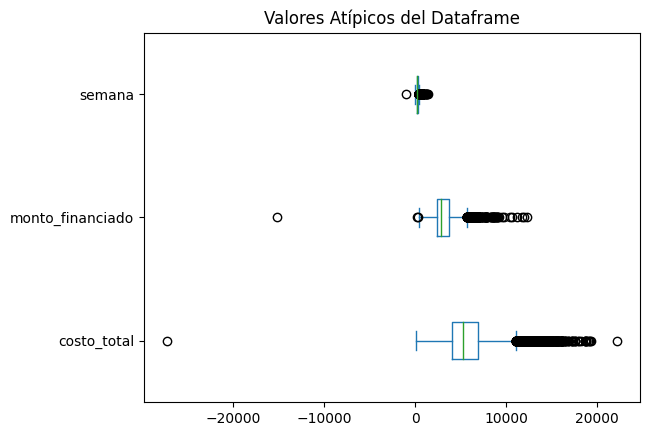

In [33]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
CredicelOut.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

# Error de Captura

<Figure size 1500x800 with 0 Axes>

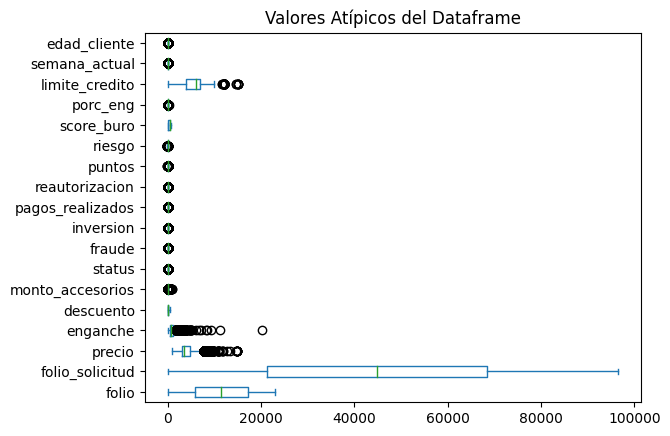

In [34]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
CredicelNoLimpio.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

<Figure size 1500x800 with 0 Axes>

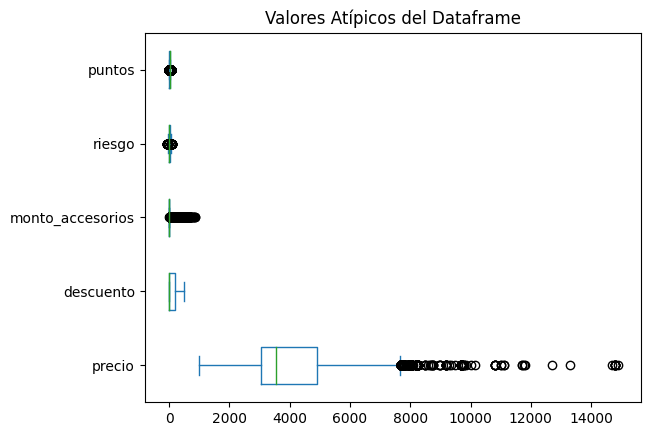

In [35]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
CredicelPrueba.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [36]:
# Valor Absoluto a las variables con error de captura

SinNeg = abs(CredicelOut)

<Figure size 1500x800 with 0 Axes>

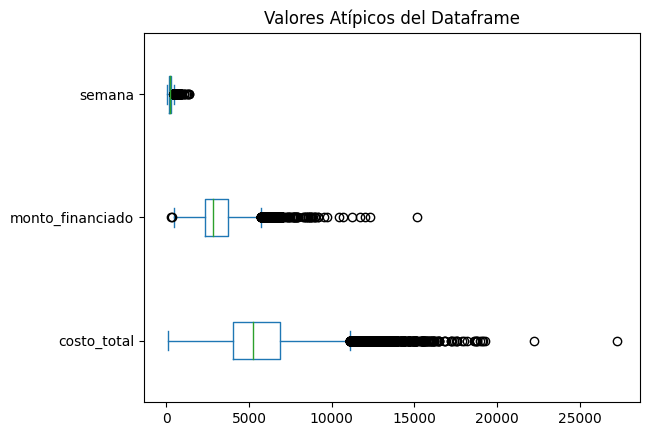

In [37]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
SinNeg.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [38]:
Datos_sin_outliers = pd.concat([CredicelNoLimpio, SinNeg], axis=1)
Datos_sin_outliers

,folio,folio_solicitud,precio,enganche,descuento,monto_accesorios,status,fraude,inversion,pagos_realizados,...,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente,costo_total,monto_financiado,semana
0,3,30,1949.0,780.0,0.0,0.0,2,0,0,0,...,0,0.00,0,40.02,5000,26,23.0,2106,1169.0,81
1,4,33,2999.0,1050.0,0.0,0.0,2,0,0,0,...,0,0.00,0,35.01,6000,13,60.0,2925,1949.0,225
2,5,37,1959.0,490.0,0.0,0.0,3,0,0,0,...,0,0.00,0,25.01,0,74,58.0,2210,1469.0,170
3,6,38,1959.0,490.0,0.0,0.0,2,0,0,0,...,0,0.00,0,25.01,7000,13,42.0,2210,1469.0,170
4,7,44,4299.0,1075.0,0.0,0.0,1,0,0,0,...,0,0.00,0,25.01,7000,74,33.0,6942,3224.0,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,3349.0,297.0,0.0,0.0,1,0,0,0,...,10,27.40,469,8.87,10000,0,22.0,5486,3052.0,211
22731,22968,96479,4100.0,1209.0,0.0,0.0,1,0,0,0,...,9,19.00,502,29.49,5000,0,27.0,5200,2891.0,200
22732,22969,96442,4849.0,1152.0,0.0,0.0,1,0,0,0,...,11,26.65,459,23.76,4750,0,36.0,6656,3697.0,256
22733,22970,96536,9799.0,2799.0,0.0,0.0,1,0,0,0,...,14,-17.35,699,28.56,7000,0,53.0,15054,7000.0,386


In [39]:
Base_Limpia = pd.concat([Datos_sin_outliers, CredicelStr], axis=1)
Base_Limpia

,folio,folio_solicitud,precio,enganche,descuento,monto_accesorios,status,fraude,inversion,pagos_realizados,...,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,razones_buro,cp_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,30,1949.0,780.0,0.0,0.0,2,0,0,0,...,Desconocido,Desconocido,Aun no se determina status,Desconocido,Desconocido,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,33,2999.0,1050.0,0.0,0.0,2,0,0,0,...,Desconocido,Desconocido,Aun no se determina status,Desconocido,Desconocido,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,37,1959.0,490.0,0.0,0.0,3,0,0,0,...,Desconocido,Desconocido,Cancelado,Desconocido,Desconocido,TANTOYUCA,VER.,0,0,0
3,6,38,1959.0,490.0,0.0,0.0,2,0,0,0,...,Desconocido,Desconocido,Aun no se determina status,Desconocido,Desconocido,AMXTLAN PUE,Desconocido,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,44,4299.0,1075.0,0.0,0.0,1,0,0,0,...,2022-03-05 00:00:00,2022-03-12 00:00:00,Mora,Desconocido,Desconocido,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,3349.0,297.0,0.0,0.0,1,0,0,0,...,2023-04-18 18:45:00,2023-04-25 00:00:00,Aun no se determina status,"K0,J0,D8,E2",97880,OXKUTZCAB,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,22968,96479,4100.0,1209.0,0.0,0.0,1,0,0,0,...,2023-04-18 18:46:00,2023-04-25 00:00:00,Aun no se determina status,"K0,J0,D8,E2",37295,LEON,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,22969,96442,4849.0,1152.0,0.0,0.0,1,0,0,0,...,2023-04-18 18:47:00,2023-04-25 00:00:00,Aun no se determina status,"K0,D7,F7,D8",20210,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,22970,96536,9799.0,2799.0,0.0,0.0,1,0,0,0,...,2023-04-18 18:49:00,2023-04-25 00:00:00,Aun no se determina status,"J0,G1,E0,E2",78434,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


In [41]:
#Convertir archivo filtrado a excel
Base_Limpia.to_excel("BaseLimpia.xlsx")

In [42]:
from google.colab import files

files.download("BaseLimpia.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>